# Students’ Adaptability Level Prediction in an Online Class

This notebook looks into using various Python-based machine learning and
data science libraries in an attempt to build a machine learning model
capable of predicting whether or not a student is capable of adapting to
an online class  based on the data provided.

The following approach will be used:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

#### 1. Problem

>Describe a person who would most likely be successful in adapting to an online distance class. [general audience]

>From which age range must a school, college, or university start offering an online distance class that ensures moderate to high adaptability level? [admissions and other administrative offices in learning institutions]

>What are the strongest indicators of having a moderate to high adaptability level in an online school? [students who would like to be in an online school community]

>If you were a learning institution that aims to maintain a high adaptability level in an online environment, what top 5 requirements would you have before admitting student applicants? [learning institutions] 

>Who would most likely be successful in an online community that is worth giving a full scholarship coverage for the entire stay in basic education and/or higher education? [government and non-government organizations offering limited slots for scholarship grants]

#### 2. Data

>The dataset is provided by the MO-IT100 - Introduction to Computing from the MMDC MyCamu's Repository. Source: https://docs.google.com/spreadsheets/d/1b0KBuWPZjwJNibOcyg5NoS4mkxUay0wBDeZAm-LHPsg/edit#gid=1140775492

>The original dataset came from Students' Adaptability Level Prediction in Online Education using Machine Learning Approaches or DOI: 10.1109/ICCCNT51525.2021.9579741.

#### 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a student is able to adapt to online schooling during the proof of concept, we'll pursue the project.


#### 4. Features

>Features are different parts of the data. Provided below is a **data dictionary** will help through the process.

### Student Adaptability Level Data Dictionary

The following are the features will be used to predict our target variable (heart disease or no heart disease).

1. `Gender` - (Boy = 1; Girl = 0) 
2. `Age` - Age in years 
    * 1-5 = 0
    * 6-10 = 1
    * 11-15 = 2
    * 16-20 = 3
    * 21-25 = 4
    * 26-30 = 5
2. `Education Level` - Current level of the student
    * School = 0
    * College = 1
    * University = 2
3. `Institution Type` - (Non Government = 0; Government = 1)
4. `IT Student` - (No = 0; Yes = 1)
5. `Location` - Not sure what this means (No = 0; Yes = 1) 
6. `Load-shedding` - (Low = 0; High = 1)
7. `Financial Condition` - the financial status of a student(No Range Provided)
    * Poor = 0
    * Mid = 1
    * Rich = 2
8. `Internet Type` - Connectivity to the network used by the student
    * Mobile Data = 0
    * Wifi = 1
9. `Network Type` - Type of generation network
    * 3G - Third Generation Network = 0
    * 4G - Fourth Generation Network = 1
10. `Class Duration` - the duration of the student class 
    * 0 = 0
    * 1-3 = 1
    * 3-6 = 2
11. `Self Lms` - (No = 0; Yes = 1)
12. `Device` - Type of device used by a student
    * Tab = 0
    * Mobile = 1
    * Computer = 2
13. `Adaptivity Level` - Adaptability level of a student to online class
    * Low = 0
    * Moderate = 1
    * High = 2

_**Note:** No personal identifiable information (PPI) can be found in the dataset._

## Preparing the tools

Data Analysis and Manipulation: Pandas, Matplotlib & NumPy

Modelling: Scikit-Learn

* [Pandas](https://pandas.pydata.org/) for data analysis.
* [NumPy](https://numpy.org/) for numerical operations.
* [Matplotlib](https://matplotlib.org/)/[Seaborn](https://seaborn.pydata.org/) for plotting or data visualization.
* [Scikit-Learn](https://scikit-learn.org/stable/) for machine learning modelling and evaluation.

In [5]:
# Import libraries for regular EDA (Exploratory Data Analysis)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Ealuations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from scikitplot.metrics import plot_roc_curve

## Load Data

In [6]:
# Read Worksheet Worksheet #4: Mini Task on Data Analytics from the data folder
df = pd.read_csv("./data/Worksheet #4_ Mini Task on Data Analytics - Dataset.csv")

# Check shape of rows and column of the dataframe shape(rows, cols)
print(f"Table Rows: {df.shape[0]} | Columns: {df.shape[1]}")

Table Rows: 1205 | Columns: 14


## Data Exploration (EDA - Exploratory Data Analysis)

#### Dataframe Overview
Based on the information provided, the data frame has 1205 rows and 14 columns. The columns are named Gender, Age, Education Level, Institution Type, IT Student, Location, Load-shedding, Financial Condition, Internet Type, Network Type, Class Duration, Self Lms, Device, and Adaptivity Level.

The "count" row indicates that there are 1205 non-missing values in each column. This means that the data frame is complete with no missing values.

The "unique" row indicates the number of distinct values for each column. For example, there are 2 unique values in the Gender column, which suggests that the data includes information about males and females. Similarly, there are 6 unique values in the Age column, suggesting that the ages of the individuals range from young to middle-aged. There are 3 unique values in the Education Level column, 2 unique values in the Institution Type column, and so on.

The "top" row indicates the most frequently occurring value in each column. For example, the most frequent Gender is "Boy", the most frequent Age group is "21-25", and the most frequent Education Level is "School". This information gives an indication of the dominant characteristics in the dataset.

The "freq" row indicates the frequency of the most frequently occurring value in each column. For example, the Gender column has 663 instances of "Boy", the Age column has 374 instances of "21-25", and so on. This information can be useful in identifying any imbalances or biases in the dataset.

Overall, this information provides a basic overview of the data frame, including the number of rows and columns, the completeness of the data, and the unique values and frequencies for each column.

In [7]:
# Overview of dataframe metrics for some quick insights
df.describe()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,2,6,3,2,2,2,2,3,2,3,3,2,3,3
top,Boy,21-25,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
freq,663,374,530,823,901,935,1004,878,695,775,840,995,1013,625


#### Null & Missing Value Check
There are no null or missing values in the dataset. The dataset includes information on various factors such as gender, age, education level, institution type, etc. of a group of individuals. The value of 0 next to each variable indicates that there are no missing values or null values for that variable in the dataset.

This suggests that the dataset is complete and can be used for analysis without the need for imputation or other techniques to address missing data. The next step would be to explore the relationships between the different variables in the dataset and conduct further analysis as needed.

In [8]:
# Check for null values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [9]:
# Check for missing values
df.isna().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

#### Finding the balance between the levels
The balance of Adaptability level can be measured by looking at the distribution of adaptivity levels across a population or sample. In this case, there are three levels: moderate, low, and high, and the number of individuals in each level is provided.

The highest number of individuals are in the moderate adaptivity level group, with 625 individuals. This suggests that the majority of individuals have a moderate level of adaptivity, meaning they are able to adjust to new situations and environments, but may struggle with major changes or unexpected events.

The low adaptivity level group contains 480 individuals, which is a substantial portion of the population. These individuals may struggle more with adapting to new situations and may benefit from additional support or resources to help them adjust.

Finally, there are only 100 individuals in the high adaptivity level group, suggesting that this is a relatively rare trait within the population. These individuals may be particularly skilled at adapting to new situations and thrive in challenging or uncertain environments.

Overall, the balance of adaptivity level within this population suggests that while most individuals have a moderate level of adaptivity, there is a significant minority who may benefit from additional support, and a smaller group who possess exceptional adaptability.

In [10]:
# Overview of dataframe
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [11]:
# Over view of how many class available in our Adaptivity column
df['Adaptivity Level'].value_counts()

Moderate    625
Low         480
High        100
Name: Adaptivity Level, dtype: int64

In [12]:
# Color CONSTANTS
PRIMARY = "#2C3333"
SECONDARY = "#395B64"
NEUTRAL = "#A5C9CA"

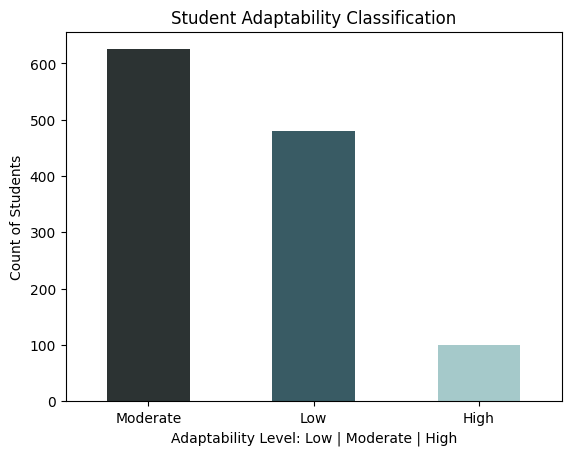

In [13]:
# Plot Adaptivity column
df['Adaptivity Level'].value_counts().plot(kind='bar', color=[PRIMARY, SECONDARY, NEUTRAL])
plt.title("Student Adaptability Classification")
plt.xlabel("Adaptability Level: Low | Moderate | High")
plt.ylabel("Count of Students")
plt.xticks(rotation = 0);

#### Student Frequency according to Gender

The crosstab comparison shows the distribution of individuals by Gender (Boy or Girl) and Adaptivity Level (High, Low, or Moderate).

We can see that there are more Boys (663) than Girls (542) in the dataset overall. Looking at the Adaptivity Level column, the most common level of adaptivity is Moderate, followed by Low and then High.

The crosstab comparison shows that there are more Boys than Girls in all three levels of Adaptivity, with the difference being most pronounced in the High Adaptivity level, where Boys make up 71 out of 100 individuals (71%).

In the Low Adaptivity level, there are more Boys than Girls, but the difference is less pronounced (245 Boys vs. 235 Girls).

In the Moderate Adaptivity level, there are also more Boys than Girls, but the difference is even smaller (347 Boys vs. 278 Girls).

Overall, this crosstab comparison suggests that there may be some gender differences in adaptivity levels, with Boys being more likely to have high adaptivity than Girls. However, further analysis would be needed to explore the relationship between gender and adaptivity more deeply and to determine the significance of these differences.

In [14]:
# Reference data dictionary
# Boy
# Girl
print("Total Gender Count")
df['Gender'].value_counts()

Total Gender Count


Boy     663
Girl    542
Name: Gender, dtype: int64

In [15]:
# Adaptability Level and Gender comparison
a_g_cross_tab = pd.crosstab(df['Adaptivity Level'], df['Gender'])
a_g_cross_tab

Gender,Boy,Girl
Adaptivity Level,,
High,71,29
Low,245,235
Moderate,347,278


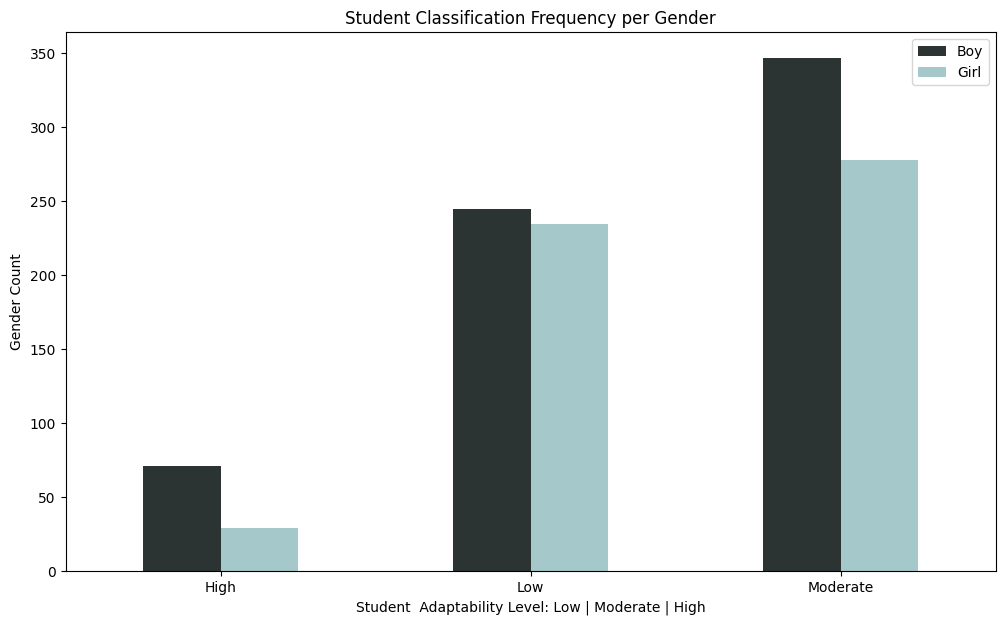

In [16]:
# Plot Crosstab
a_g_cross_tab.plot(kind='bar', figsize=(12,7), color=[PRIMARY, NEUTRAL]);
plt.title("Student Classification Frequency per Gender")
plt.xlabel("Student  Adaptability Level: Low | Moderate | High")
plt.ylabel("Gender Count")
plt.legend(['Boy', 'Girl'])
plt.xticks(rotation=0);

#### Age & Adaptability Level 
The crosstab comparison shows the distribution of individuals by Age group (1-5, 6-10, 11-15, 16-20, 21-25, and 26-30) and Adaptivity Level (High, Low, or Moderate).

We can see that the most common age group in the dataset is 11-15 years old, followed by 21-25 and 16-20.

Looking at the Adaptivity Level column, the most common level of adaptivity is Moderate, followed by Low and then High.

The crosstab comparison shows that the highest number of individuals with High Adaptivity is in the age group of 21-25 (38 individuals), followed by 11-15 (28 individuals).

In the Low Adaptivity level, the highest number of individuals is in the age group of 144 individuals in the age range of 16-20, followed by 139 individuals in the age range of 21-25.

In the Moderate Adaptivity level, the highest number of individuals is in the age group of 205 individuals in the age range of 11-15, followed by 197 individuals in the age range of 21-25.

Overall, this crosstab comparison suggests that age group may have an impact on adaptivity levels, with the age group of 11-15 being more likely to have moderate adaptivity, while the age group of 21-25 is more likely to have high adaptivity. However, further analysis would be needed to explore the relationship between age and adaptivity more deeply and to determine the significance of these differences.

In [17]:
# Adaptability Level & Age comparison
a_a_cross_tab = pd.crosstab(df['Age'], df['Adaptivity Level'])
a_a_cross_tab

Adaptivity Level,High,Low,Moderate
Age,,,
1-5,0,17,64
11-15,28,120,205
16-20,5,144,129
21-25,38,139,197
26-30,12,36,20
6-10,17,24,10


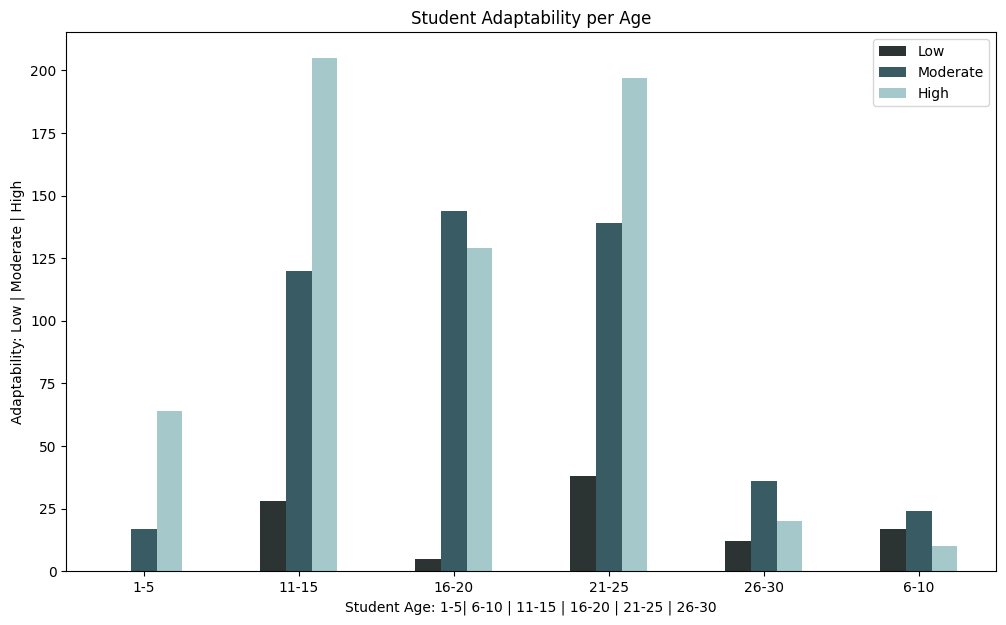

In [18]:
# Plot Crosstab
a_a_cross_tab.plot(kind="bar",
                  figsize=(12, 7),
                  color=[PRIMARY, SECONDARY, NEUTRAL]);
plt.title("Student Adaptability per Age")
plt.xlabel("Student Age: 1-5| 6-10 | 11-15 | 16-20 | 21-25 | 26-30")
plt.ylabel("Adaptability: Low | Moderate | High")
plt.legend(['Low', 'Moderate', 'High'])
plt.xticks(rotation=0);

#### Education Level & Adaptability Level
The crosstab comparison shows the distribution of individuals by Education Level (College, School, and University) and Adaptivity Level (High, Low, or Moderate).

We can see that the most common Education Level in the dataset is School, followed by University and then College.

Looking at the Adaptivity Level column, the most common level of adaptivity is Moderate, followed by Low and then High.

The crosstab comparison shows that the highest number of individuals with High Adaptivity is in the Education Level of University (50 individuals), followed by School (47 individuals).


Overall, this crosstab comparison suggests that education level may have an impact on adaptivity levels, with individuals who attend University being more likely to have high adaptivity and individuals who attend School being more likely to have low or moderate adaptivity. However, further analysis would be needed to explore the relationship between education level and adaptivity more deeply and to determine the significance of these differences.

In [19]:
e_a_cross_tab = pd.crosstab(df['Education Level'], df['Adaptivity Level'])
e_a_cross_tab

Adaptivity Level,High,Low,Moderate
Education Level,,,
College,3,120,96
School,47,182,301
University,50,178,228


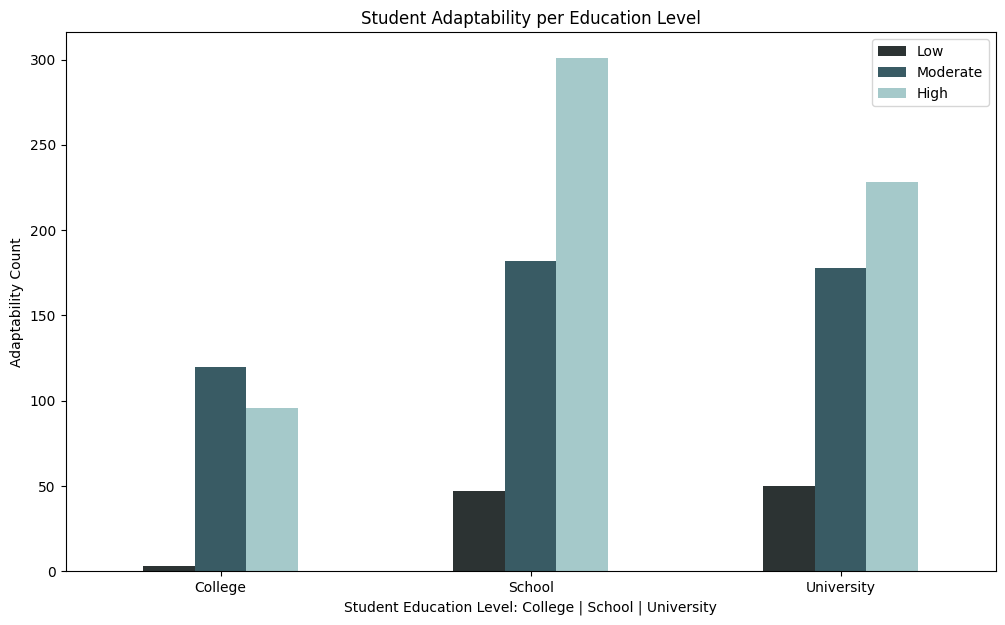

In [20]:
# Plot Crosstab
e_a_cross_tab.plot(kind="bar",
                  figsize=(12, 7),
                  color=[PRIMARY, SECONDARY, NEUTRAL]);
plt.title("Student Adaptability per Education Level")
plt.xlabel("Student Education Level: College | School | University")
plt.ylabel("Adaptability Count")
plt.legend(['Low', 'Moderate', 'High'])
plt.xticks(rotation=0);

In [45]:
i_a_cross_tab = pd.crosstab(df['Institution Type'], df['Adaptivity Level'])
i_a_cross_tab

Adaptivity Level,High,Low,Moderate
Institution Type,,,
Government,20,234,128
Non Government,80,246,497


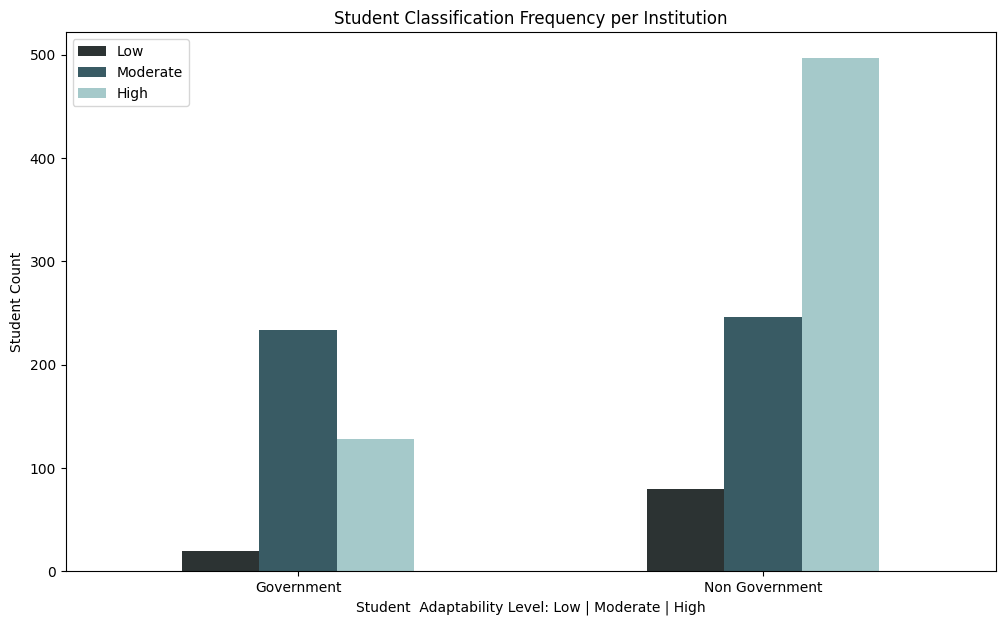

In [48]:
# Plot Crosstab
i_a_cross_tab.plot(kind='bar', figsize=(12,7), color=[PRIMARY, SECONDARY, NEUTRAL]);
plt.title("Student Classification Frequency per Institution")
plt.xlabel("Student  Adaptability Level: Low | Moderate | High")
plt.ylabel("Student Count")
plt.legend(['Low', 'Moderate', 'High'])
plt.xticks(rotation=0);

In [21]:
modDf = df

In [37]:
modded = modDf.replace(
    {
        'Boy': 0, 
        'Girl': 1,
        '1-5': 0,
        '6-10': 1,
        '11-15': 2,
        '16-20': 3,
        '21-25': 4,
        '26-30': 5,
        'School': 0,
        'College': 1,
        'University': 2,
        'Non Government': 0,
        'Government': 1,
        'No': 0,
        'Yes': 1,
        'Poor': 0,
        'Mid': 1,
        'Rich': 2,
        'Mobile Data': 0,
        'Wifi': 1,
        '3G': 0,
        '4G': 1,
        '0': 0,
        '1-3': 1,
        '3-6': 2,
        'Tab': 0,
        'Mobile': 1,
        'Computer': 2,
    }
)

modded['Adaptivity Level'] = modded['Adaptivity Level'].replace({'Low': 0, 'Moderate': 1, 'High': 2})

modded['Load-shedding'] = modded['Load-shedding'].replace({'Low': 0, 'High':1})

modded.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,0,4,2,0,0,1,0,1,1,1,2,0,0,1
1,1,4,2,0,0,1,1,1,0,1,1,1,1,1
2,1,3,1,1,0,1,0,1,1,1,1,0,1,1
3,1,2,0,0,0,1,0,1,0,1,1,0,1,1
4,1,3,0,0,0,1,0,0,0,0,0,0,1,0


#### Correlation between independent variables

Correlation Matrix: A higher positive value means a potential positive correlation, a higher negative value means a potential negative correlation.

However, I am not an admissions expert and reading this result needs experience and expertise.

In [41]:
# Finding correlation
corr_matrix = modded.corr()


C:\Users\nroque\AppData\Local\Temp\ipykernel_19708\590264952.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = modded.corr()


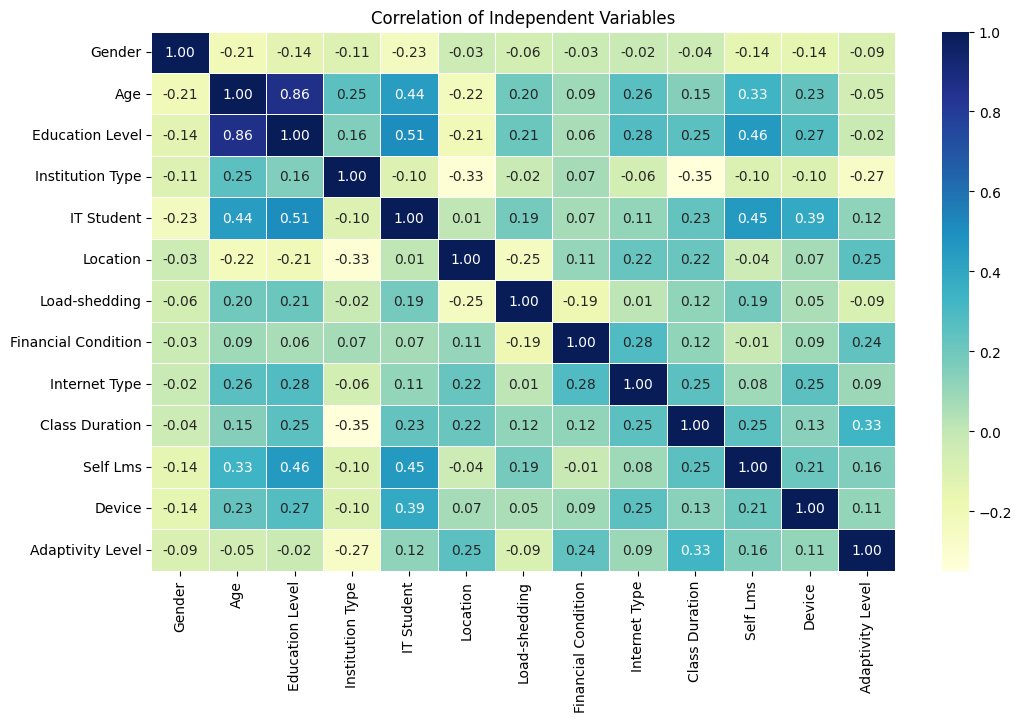

In [44]:
#Visualize correlation
fig, ax = plt.subplots(figsize=(12, 7))

# Use seaborn to visualize
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")

# Customize
ax.set(title="Correlation of Independent Variables");


## Conclusion

#### <b>Describe a person who would most likely be successful in adapting to an online distance class. [general audience] </b>

A correlation of 0.86 between Education Level and Age suggests that there is a strong positive relationship between these two variables. This means that as a person's age increases, their level of education is also likely to increase. Based on this correlation, a person who is most likely to be successful in adapting to an online distance class is likely to be someone who is: 

Older in age: As the correlation suggests, an older person is more likely to have a higher level of education, which may give them an advantage in adapting to an online distance class.

Highly educated: A person with a higher level of education is likely to have the skills and knowledge necessary to be successful in an online distance class.

Self-motivated: In an online distance class, students need to be self-motivated and able to manage their time effectively. A person who is highly motivated is more likely to succeed in this type of learning environment.

Technologically proficient: In an online distance class, students must be able to navigate and use various technologies. A person who is comfortable with technology and has the necessary skills is more likely to be successful.

Strong in communication: Online distance classes often require students to communicate with instructors and peers through written communication. A person who is strong in written communication may be more likely to excel in this type of environment.

It is important to note that the above characteristics are only based on the correlation between Education Level and Age, and other factors may also play a significant role in determining a person's success in an online distance class.

#### <b>From which age range must a school, college, or university start offering an online distance class that ensures moderate to high adaptability level? [admissions and other administrative offices in learning institutions]</b>

Based on the results that show that the age ranges of 11-15 and 21-25 have a high adaptability level, it may be beneficial for a school, college, or university to start offering an online distance class from these age ranges onwards.

However, it is important to note that this is only based on the data provided, and there may be other factors that influence a person's adaptability level in an online distance class. Additionally, it may be worthwhile for educational institutions to offer online distance classes to students outside of these age ranges who may also have a high adaptability level.

Ultimately, the decision to offer online distance classes and at which age range to start offering them should be based on a thorough evaluation of the institution's resources, the needs of their students, and the goals of their educational programs.

#### <b>What are the strongest indicators of having a moderate to high adaptability level in an online school? [students who would like to be in an online school community]</b>

Based on the information provided, the strongest indicators of having a moderate to high adaptability level in an online school are:

Education level: A higher level of education is associated with a higher adaptability level in an online school.

Age: Older students and those in the age range of 11-15 and 21-25 are more likely to have a moderate to high adaptability level in an online school.

IT Student: Being an IT student is associated with a higher adaptability level in an online school, as these students may have more experience with technology and digital learning environments.

Self LMS: Students who are able to use and navigate a learning management system (LMS) independently are more likely to have a higher adaptability level in an online school.

Class duration: Shorter class duration is associated with a higher adaptability level in an online school, as students may be able to stay more focused and engaged in shorter, more frequent learning sessions.

It is important to note that these are only based on the information provided, and other factors may also play a role in a student's adaptability level in an online school.

#### <b>If you were a learning institution that aims to maintain a high adaptability level in an online environment, what top 5 requirements would you have before admitting student applicants? [learning institutions] </b>

As a learning institution that aims to maintain a high adaptability level in an online environment, the top 5 requirements to consider before admitting student applicants may include:

A minimum level of education: Given that education level is a strong indicator of adaptability in an online school, the institution may consider setting a minimum educational requirement for admission.

Technological competence: The institution may assess applicants' technological competence to ensure that they have the necessary skills and equipment to succeed in an online learning environment.

Independent learning ability: The institution may evaluate applicants' ability to learn independently, as self-directed learning is an important aspect of success in an online environment.

Learning management system (LMS) proficiency: The institution may also assess applicants' proficiency with an LMS, as this is a tool that is commonly used in online learning.

Motivation and commitment: The institution may evaluate applicants' motivation and commitment to the program, as these factors can impact their ability to succeed in an online environment.

Of course, these requirements may be modified based on the specific goals, resources, and needs of the learning institution.

#### <b>Who would most likely be successful in an online community that is worth giving a full scholarship coverage for the entire stay in basic education and/or higher education? [government and non-government organizations offering limited slots for scholarship grants]</b>

Based on the information given, a person who is most likely to be successful in an online community and is worth giving a full scholarship coverage for the entire stay in basic or higher education would be a non-government IT student. This is because the data suggests that non-government students have a higher adaptability level, which is a strong indicator of success in online learning environments. Additionally, being an IT student suggests that the person has some level of technological competence, which is another important factor in succeeding in an online community. However, it is important to note that individual characteristics, motivation, and commitment also play a significant role in determining success in an online learning environment, and these should be taken into consideration as well when selecting scholarship recipients.

## Author
#### Nikko Roque

## Acknowledgements
#### Mapua Malayan Digital College